In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

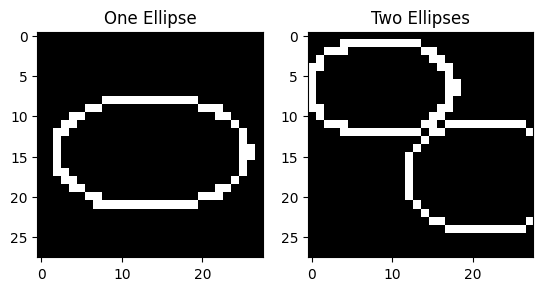

In [6]:
def generate_phantom(num_ellipses):
    image = np.zeros((28, 28))
    for _ in range(num_ellipses):
        rx, ry = np.random.randint(5, 14, size=2) 
        cx, cy = np.random.randint(5, 23, size=2) 
        theta = np.linspace(0, 2*np.pi, 100)
        x = rx * np.cos(theta) + cx
        y = ry * np.sin(theta) + cy

        for i in range(len(x)):
            if 0 <= int(x[i]) < 28 and 0 <= int(y[i]) < 28:
                image[int(y[i]), int(x[i])] = 1
    return image

fig, axs = plt.subplots(1, 2)
axs[0].imshow(generate_phantom(1), cmap='gray')
axs[0].set_title('One Ellipse')
axs[1].imshow(generate_phantom(2), cmap='gray')
axs[1].set_title('Two Ellipses')
plt.show()


In [7]:
def generate_dataset(num_samples):
    X = np.zeros((num_samples, 28, 28, 1))
    y = np.zeros((num_samples,))
    for i in range(num_samples):
        num_ellipses = np.random.choice([1, 2])
        X[i, :, :, 0] = generate_phantom(num_ellipses)
        y[i] = num_ellipses - 1
    return X, y

X, y = generate_dataset(1000)


In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 64)                495680    
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                        

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
25/25 [==============================] - 0s 9ms/step - loss: 0.6693 - accuracy: 0.6612 - val_loss: 0.5242 - val_accuracy: 0.8550
Epoch 2/10
25/25 [==============================] - 0s 6ms/step - loss: 0.2125 - accuracy: 0.9600 - val_loss: 0.0676 - val_accuracy: 0.9800
Epoch 3/10
25/25 [==============================] - 0s 6ms/step - loss: 0.0359 - accuracy: 0.9925 - val_loss: 0.0414 - val_accuracy: 0.9950
Epoch 4/10
25/25 [==============================] - 0s 6ms/step - loss: 0.0164 - accuracy: 0.9950 - val_loss: 0.0357 - val_accuracy: 0.9900
Epoch 5/10
25/25 [==============================] - 0s 6ms/step - loss: 0.0084 - accuracy: 0.9987 - val_loss: 0.0289 - val_accuracy: 0.9950
Epoch 6/10
25/25 [==============================] - 0s 6ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0260 - val_accuracy: 0.9950
Epoch 7/10
25/25 [==============================] - 0s 6ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0224 - val_accuracy: 0.9950
Epoch 8/10
25/25 [==

1/1 [==============================] - 0s 55ms/step


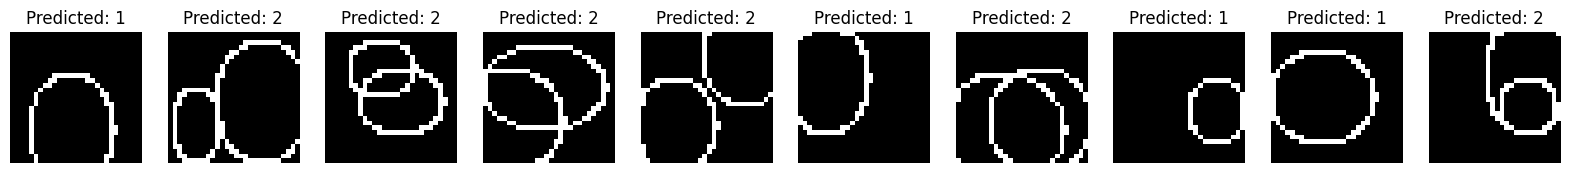

In [10]:
num_test_samples = 10
X_test = np.zeros((num_test_samples, 28, 28, 1))

for i in range(num_test_samples):
    num_ellipses = np.random.choice([1, 2])
    X_test[i, :, :, 0] = generate_phantom(num_ellipses)

predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1) + 1 #match prediction

fig, axs = plt.subplots(1, num_test_samples, figsize=(20, 2))
for i in range(num_test_samples):
    axs[i].imshow(X_test[i, :, :, 0], cmap='gray')
    axs[i].set_title(f'Predicted: {predicted_classes[i]}')
    axs[i].axis('off')
plt.show()
